In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Project 
## Store Sales Predictive Analysis

In [45]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\store_sales.csv")

# Data Info

In [46]:
df.shape

(7300, 5)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7300 non-null   object 
 1   store    7300 non-null   int64  
 2   sales    7300 non-null   float64
 3   promo    7300 non-null   int64  
 4   holiday  7300 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 285.3+ KB


In [48]:
df.head()

,date,store,sales,promo,holiday
0,2022-01-01,1,184.78,0,0
1,2022-01-02,1,192.62,0,0
2,2022-01-03,1,212.68,0,0
3,2022-01-04,1,249.58,1,0
4,2022-01-05,1,223.50,0,0


# Data Handling & Cleaning

In [49]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [50]:
df["date"]=pd.to_datetime(df["date"])

In [51]:
# Basic stats
print(df.describe())
print(df.info())

# Extract time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()


                      date        store        sales        promo      holiday
count                 7300  7300.000000  7300.000000  7300.000000  7300.000000
mean   2022-12-31 12:00:00     5.500000   228.434571     0.202192     0.104110
min    2022-01-01 00:00:00     1.000000   160.710000     0.000000     0.000000
25%    2022-07-02 00:00:00     3.000000   209.217500     0.000000     0.000000
50%    2022-12-31 12:00:00     5.500000   226.795000     0.000000     0.000000
75%    2023-07-02 00:00:00     8.000000   245.590000     0.000000     0.000000
max    2023-12-31 00:00:00    10.000000   340.730000     1.000000     1.000000
std                    NaN     2.872478    26.625636     0.401662     0.305424
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7300 non-null   datetime64[ns]
 1   store    7300 non-null   int64         
 2 

# Machine Learning & Visualization

In [54]:
le=LabelEncoder()
df["weekday"]=le.fit_transform(df["weekday"])

In [55]:
df.drop(columns=["date"],inplace=True)

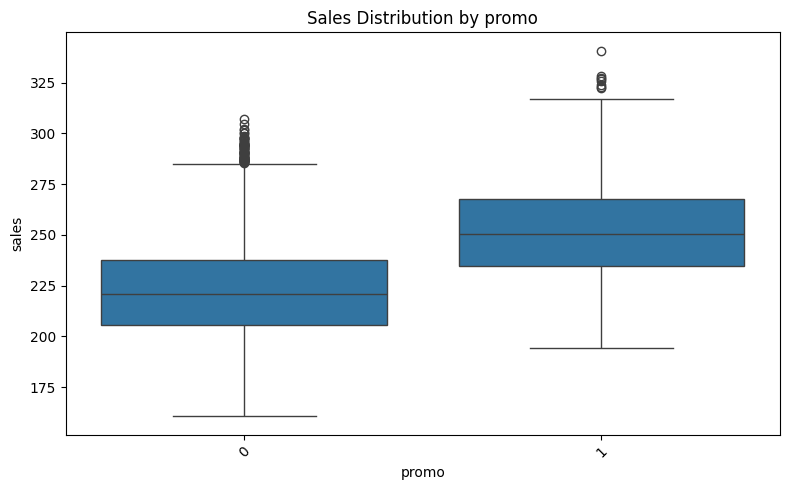

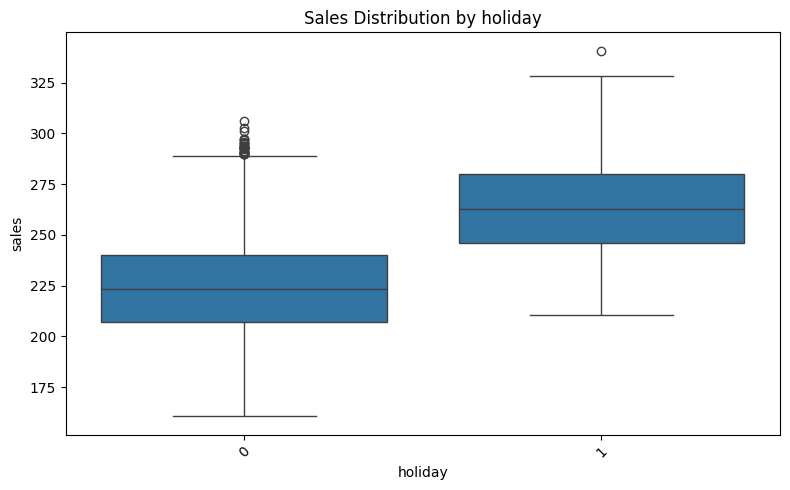

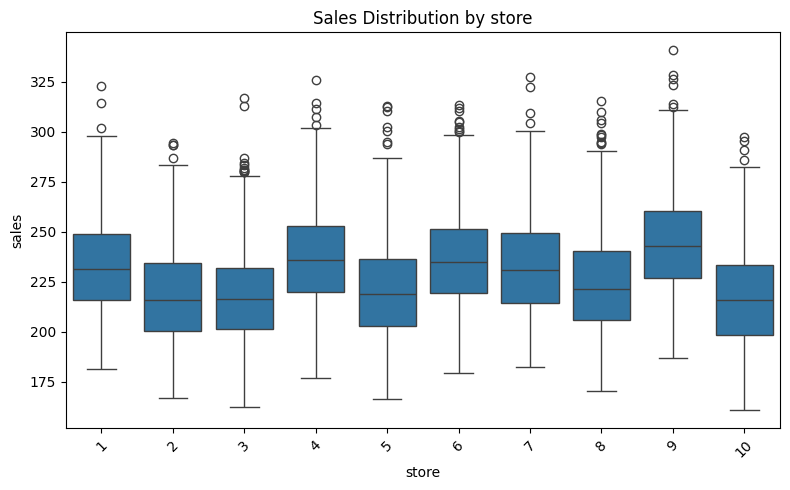

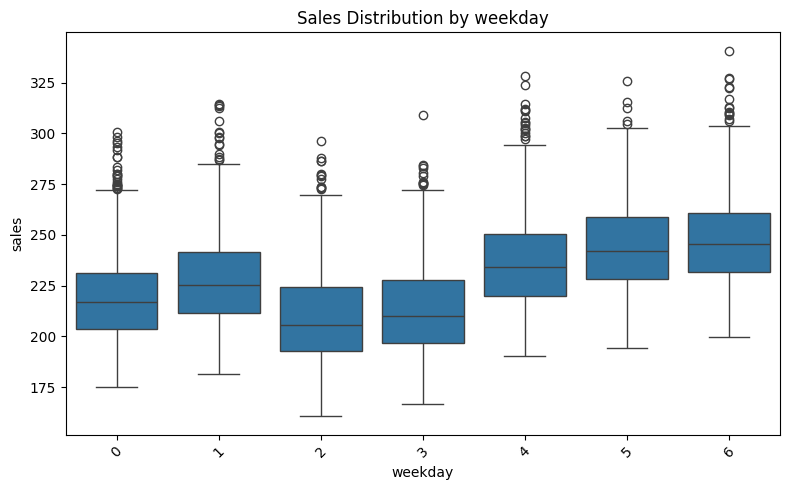

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns excluding 'sales'
categorical_cols = ['promo', 'holiday', 'store', 'weekday']  # You can expand this if needed

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y='sales')
    plt.title(f'Sales Distribution by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Linear Regression Model

In [60]:
# Residual plot after fitting a linear model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=["sales"])
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_absolute_error,mean_squared_error


In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.3f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


R² Score: 0.712
MAE: 11.73
RMSE: 14.41


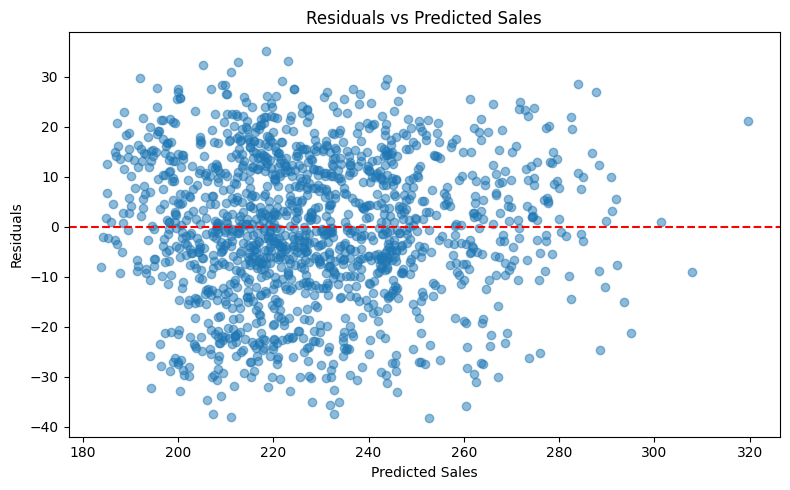

In [62]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.tight_layout()
plt.show()


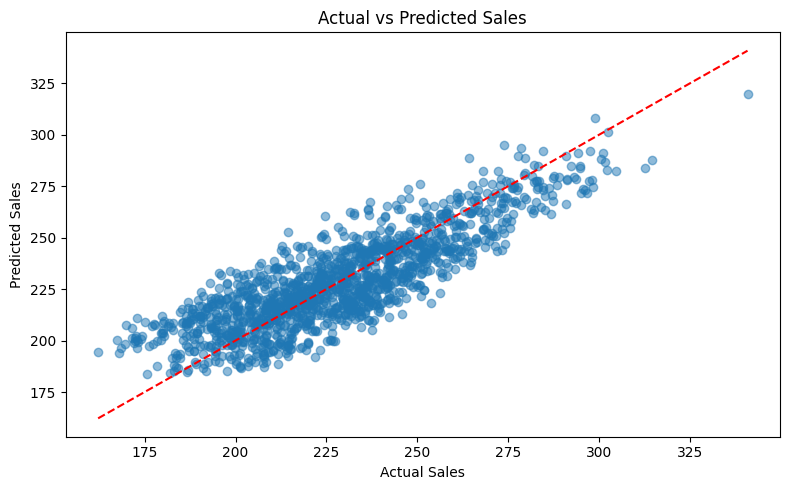

In [63]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.tight_layout()
plt.show()


# XGB Regressor Model 

In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


In [65]:
# Metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'XGBoost R² Score: {r2_xgb:.3f}')
print(f'XGBoost MAE: {mae_xgb:.2f}')
print(f'XGBoost RMSE: {rmse_xgb:.2f}')


XGBoost R² Score: 0.959
XGBoost MAE: 4.29
XGBoost RMSE: 5.43


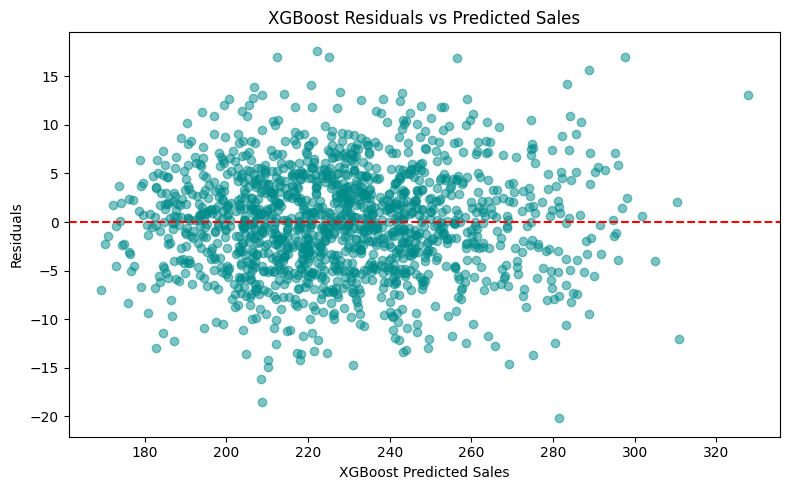

In [66]:
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5, color='darkcyan')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('XGBoost Predicted Sales')
plt.ylabel('Residuals')
plt.title('XGBoost Residuals vs Predicted Sales')
plt.tight_layout()
plt.show()


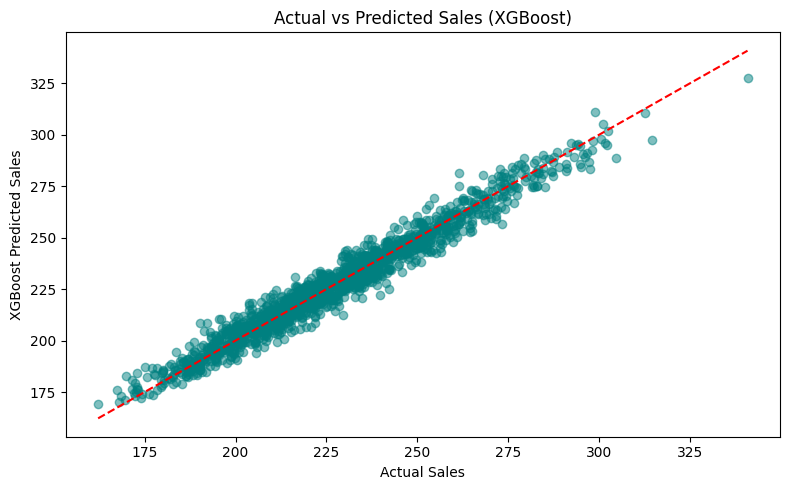

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('XGBoost Predicted Sales')
plt.title('Actual vs Predicted Sales (XGBoost)')
plt.tight_layout()
plt.show()
